<a href="https://colab.research.google.com/github/ItsMacto/ML-Models/blob/main/First_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
 import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

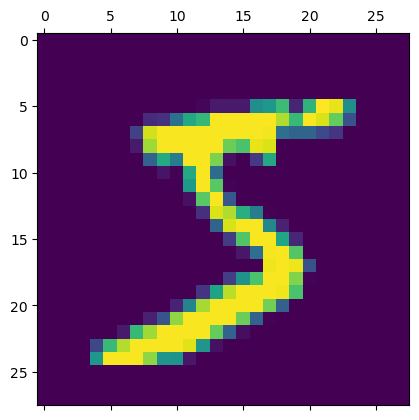

In [25]:
plt.matshow(X_train[0])
y_train[0]

In [26]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
# X_train_flattened = X_train.reshape(len(X_train), 28*28)
# X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)
# X_train_flattened[0]

In [29]:
def simple_ann():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(10, activation='softmax') #sigmoid is another option but worse
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # was using SGD
    return model

In [30]:
# model = simple_ann()
# model.fit(X_train, y_train, epochs=5)

In [31]:
def ann_3_layers():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# model = ann_3_layers()
# model.fit(X_train, y_train, epochs=5)

In [33]:
def ann_deep():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# model = ann_deep()
# model.fit(X_train, y_train, epochs=5)

CNN TIME!

In [35]:
def cnn():
  model = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


In [36]:
# model = cnn()
# model.fit(X_train, y_train, epochs=5)

In [37]:
models_dict = {
    "Simple ANN": simple_ann(),
    "ANN with 3 layers": ann_3_layers(),
    "Deep ANN": ann_deep(),
    "CNN": cnn()
}

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
for model_name, model in models_dict.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train, epochs=5, verbose=1)

Training Simple ANN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7152 - loss: 1.1271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8761 - loss: 0.4725
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8919 - loss: 0.4051
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.3788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9026 - loss: 0.3550
Training ANN with 3 layers...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9035 - loss: 0.3125
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9748 - loss: 0.0817
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9829 - loss: 0.0534
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9874 - loss: 0.0371
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9894 - loss: 0.0308
Training Deep ANN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/s

In [39]:
# Testing models
for model_name, model in models_dict.items():
    print(f"Evaluating {model_name}...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Evaluating Simple ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3842
Simple ANN - Test Accuracy: 0.9089, Test Loss: 0.3365
Evaluating ANN with 3 layers...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0979
ANN with 3 layers - Test Accuracy: 0.9771, Test Loss: 0.0833
Evaluating Deep ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.1374
Deep ANN - Test Accuracy: 0.9712, Test Loss: 0.1122
Evaluating CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0365
CNN - Test Accuracy: 0.9911, Test Loss: 0.0283


In [40]:
import numpy as np
from scipy.ndimage import shift

# Function to shift the image
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))  # Ensure each image is 28x28
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape(28, 28)  # Keep shape consistent as 28x28

# Copy original dataset
X_train_augmented = [image.reshape(28, 28) for image in X_train]  # Ensure shape is consistent
y_train_augmented = [label for label in y_train]

# Create shifted images
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        shifted_img = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_img)
        y_train_augmented.append(label)

# Convert to NumPy arrays with consistent shapes
X_train_augmented = np.array(X_train_augmented).reshape(-1, 28, 28)  # Reshape to (n_samples, 28, 28)
y_train_augmented = np.array(y_train_augmented)


In [41]:
for model_name, model in models_dict.items():
    print(f"Training {model_name}...")
    model.fit(X_train_augmented, y_train_augmented, epochs=5, verbose=1, batch_size=128)

Training Simple ANN...
Epoch 1/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8456 - loss: 0.5178
Epoch 2/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8582 - loss: 0.4889
Epoch 3/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8651 - loss: 0.4703
Epoch 4/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8697 - loss: 0.4604
Epoch 5/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8731 - loss: 0.4527
Training ANN with 3 layers...
Epoch 1/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9854 - loss: 0.0466
Epoch 2/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9927 - loss: 0.0215
Epoch 3/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9949 - loss: 0.0150
Epoch 4/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 5/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9965 - loss: 0.0101
Training Deep ANN...
Epoch 1/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/s

In [42]:
# Testing models with augmented training data
for model_name, model in models_dict.items():
    print(f"Evaluating {model_name}...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Evaluating Simple ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.3525
Simple ANN - Test Accuracy: 0.9177, Test Loss: 0.3077
Evaluating ANN with 3 layers...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0641
ANN with 3 layers - Test Accuracy: 0.9869, Test Loss: 0.0508
Evaluating Deep ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0704
Deep ANN - Test Accuracy: 0.9881, Test Loss: 0.0579
Evaluating CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0253
CNN - Test Accuracy: 0.9938, Test Loss: 0.0219


Now I want to practice using PyTorch

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


Using device: mps


In [63]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [64]:
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.softmax(self.fc1(x), dim=1)
        return x

In [65]:
class ANN3Layers(nn.Module):
  def __init__(self):
    super(ANN3Layers, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 1000)
    self.fc2 = nn.Linear(1000, 100)
    self.fc3 = nn.Linear(100, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x), dim=1)
    return x

In [66]:
class DeepANN(nn.Module):
  def __init__(self):
    super(DeepANN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 3000)
    self.fc2 = nn.Linear(3000, 1000)
    self.fc3 = nn.Linear(1000, 256)
    self.fc4 = nn.Linear(256, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.softmax(self.fc4(x), dim=1)
    return x

In [67]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(64 * 7 * 7, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)

    x = x.view(-1, 64 * 7 * 7)
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x), dim=1)
    return x


In [68]:
models_dict = {
    "Simple ANN": SimpleANN().to(device),
    "ANN with 3 layers": ANN3Layers().to(device),
    "Deep ANN": DeepANN().to(device),
    "CNN Model": CNN().to(device)
}

In [69]:
# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [70]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test images: {100 * correct / total:.2f}%')


In [71]:
criterion = nn.CrossEntropyLoss()

for model_name, model in models_dict.items():
    print(f"Training {model_name}...")
    optimizer = optim.Adam(model.parameters())
    train_model(model, train_loader, criterion, optimizer, num_epochs=5)
    print(f"Evaluating {model_name}...")
    test_model(model, test_loader)

Training Simple ANN...
Epoch [1/5], Loss: 1.6926
Epoch [2/5], Loss: 1.5764
Epoch [3/5], Loss: 1.5631
Epoch [4/5], Loss: 1.5569
Epoch [5/5], Loss: 1.5527
Evaluating Simple ANN...
Accuracy on the test images: 92.01%
Training ANN with 3 layers...
Epoch [1/5], Loss: 1.5954
Epoch [2/5], Loss: 1.5318
Epoch [3/5], Loss: 1.5201
Epoch [4/5], Loss: 1.5124
Epoch [5/5], Loss: 1.5101
Evaluating ANN with 3 layers...
Accuracy on the test images: 94.74%
Training Deep ANN...
Epoch [1/5], Loss: 1.6724
Epoch [2/5], Loss: 1.6257
Epoch [3/5], Loss: 1.6531
Epoch [4/5], Loss: 1.6819
Epoch [5/5], Loss: 1.6423
Evaluating Deep ANN...
Accuracy on the test images: 83.96%
Training CNN Model...
Epoch [1/5], Loss: 1.5471
Epoch [2/5], Loss: 1.4858
Epoch [3/5], Loss: 1.4794
Epoch [4/5], Loss: 1.4764
Epoch [5/5], Loss: 1.4749
Evaluating CNN Model...
Accuracy on the test images: 98.81%


In [61]:
import torch
print("MPS available:", torch.backends.mps.is_available())

MPS available: True
